In [7]:
# import all libraries here
import os
import os
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import shutil
import glob
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.models import Model
import tensorflow as tf


In [8]:
original_path = '../input/v2-plant-seedlings-dataset/nonsegmentedv2' 

In [9]:
# Randomly checked all images under class cleavers
total = 0
for i in os.listdir(original_path):
  pa = os.path.join(original_path, i)
  for m in glob.glob(pa +'/*'):
    if m.split('/')[-2] == 'Cleavers':
      total += 1
print(f'Total images: {total}')

Total images: 335


In [13]:
# Created a directory to save all images at one location
concat_path = './all_files'
chk_fld = os.path.isdir(concat_path)

if not chk_fld:
  os.mkdir(concat_path)
  print(f'folder created Successfully: {concat_path}')

else:
  print('Folder already present')


folder created Successfully: ./all_files


In [14]:
#shutil.rmtree('./all_files')

In [15]:
# Script to print all the images
total = 0
for i in os.listdir(original_path):
    pa = os.path.join(original_path, i)
    for m in glob.glob(pa +'/*'):
        new_name = str(m.split('/')[-2]) + '_' + str(m.split('/')[-1])
        path = os.path.join(concat_path, new_name)
        #print(m)
        im_dim = cv2.imread(m)
        cv2.imwrite(path, im_dim)
        #shutil.copyfile(m, path)
        total += 1
        #print(f'{m}: image uploaded to destination')
print(f'\n--------Total files uploaded: {total}')


--------Total files uploaded: 5539


In [16]:
# A list of all species/classes
os.listdir(original_path)

['Scentless Mayweed',
 'Common wheat',
 'Charlock',
 'Black-grass',
 'Sugar beet',
 'Loose Silky-bent',
 'Maize',
 'Cleavers',
 'Common Chickweed',
 'Fat Hen',
 'Small-flowered Cranesbill',
 'Shepherd’s Purse']

In [17]:
ls ={}
total_images = 0
for root, dirs, files in os.walk(original_path):
  if root.endswith('nonsegmentedv2'):
    pass
  else:
    if root not in ls:
      ls[root] = len(files)
      total_images += len(files)
      #print(len(files),'----',files)

for key,values in ls.items():
  trunc_class = key.split('/')[-1]
  print(f'{trunc_class}: {values}')
print(f'\nTotal Images:- {total_images}')

Scentless Mayweed: 607
Common wheat: 253
Charlock: 452
Black-grass: 309
Sugar beet: 463
Loose Silky-bent: 762
Maize: 257
Cleavers: 335
Common Chickweed: 713
Fat Hen: 538
Small-flowered Cranesbill: 576
Shepherd’s Purse: 274

Total Images:- 5539


In [18]:
all_file_path = "./all_files"

In [19]:
cols = ['file_path', 'target']
lst = []
for f_name in glob.glob(all_file_path + '/*'):
  name = f_name.split('/')[-1]
  class_nm = name.split('_')[0]
  lst.append([f_name,class_nm])

df = pd.DataFrame(lst, columns=cols)
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,file_path,target
0,./all_files/Scentless Mayweed_511.png,Scentless Mayweed
1,./all_files/Maize_182.png,Maize
2,./all_files/Scentless Mayweed_277.png,Scentless Mayweed
3,./all_files/Sugar beet_13.png,Sugar beet
4,./all_files/Small-flowered Cranesbill_479.png,Small-flowered Cranesbill
5,./all_files/Small-flowered Cranesbill_312.png,Small-flowered Cranesbill
6,./all_files/Fat Hen_54.png,Fat Hen
7,./all_files/Common wheat_241.png,Common wheat
8,./all_files/Cleavers_79.png,Cleavers
9,./all_files/Shepherd’s Purse_50.png,Shepherd’s Purse


In [20]:
df.shape

(5539, 2)

(330, 330, 3)


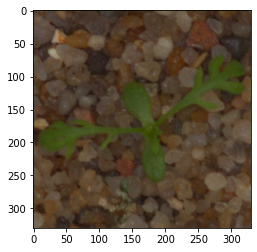

In [21]:
plant_img = imread(df['file_path'][0])
plt.imshow(plant_img)
print(plant_img.shape)

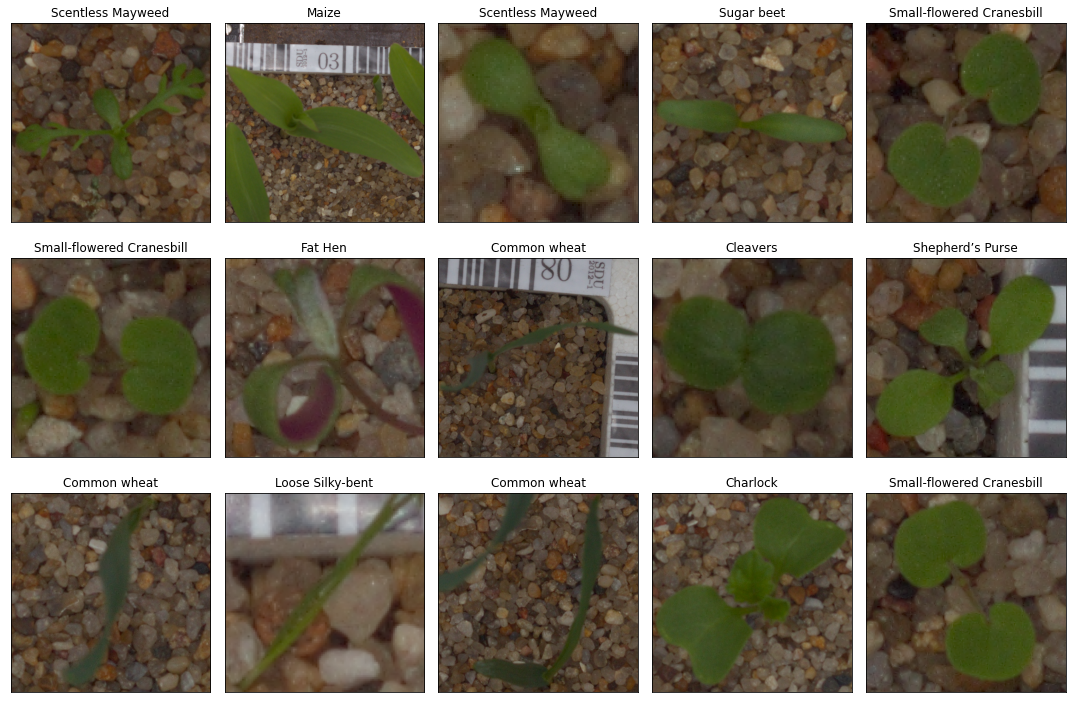

In [22]:
# Display some pictures of the dataset with their labels
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.file_path[i]))
    ax.set_title(df.target[i])

plt.tight_layout()
plt.show()

# Balance the class distribution

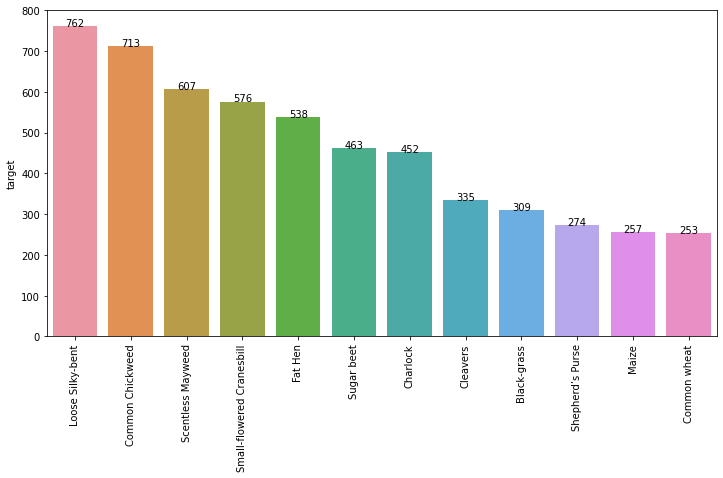

In [24]:
fig, ax1 = plt.subplots(figsize=(12,6))
graph = sns.barplot(x=df.target.value_counts().index, y=df.target.value_counts())
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        df['target'].value_counts()[i],ha="center")
    i += 1
plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
plt.rc('ytick', labelsize=8)    # fontsize of the tick labels
#df.groupby('target').count()

In [ ]:
#plant_im = imread(im_df['FilePaths'][0])
#plt.imshow(plant_im)

### Checking the average shape of the images

In [25]:
dim1 = []
dim2 = []

for im_filename in df['file_path']:
    
    img = imread(im_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


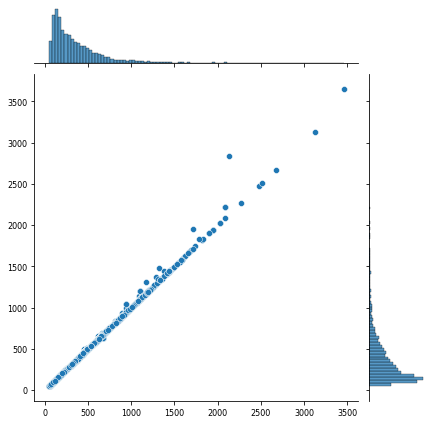

In [26]:
sns.jointplot(dim1,dim2)

**In real time Convolution neural network won't be able to train images of all varying size, thus we need to resize the images.
In above plot, we have shape of the image ranging from 0-500 to >3500, therefore in preprocessing steps we will resize the images.**

In [27]:
v2seed = os.listdir(original_path)
sample_size = 250

for index, cat in enumerate(v2seed):
  cat = str(cat.strip())
  
  if cat not in ['.ipynb_checkpoints']:
    sample_df = df.loc[df['target'] == cat].sample(n=sample_size,random_state=42)
    print(sample_df.head(1))

    if index == 0:
      final_sampled_df = sample_df

    else:
      final_sampled_df = pd.concat([final_sampled_df, sample_df]).reset_index(drop=True)

display(final_sampled_df.groupby('target').count())
  
final_sampled_df.head()

                                  file_path             target
5085  ./all_files/Scentless Mayweed_596.png  Scentless Mayweed
                             file_path        target
4609  ./all_files/Common wheat_210.png  Common wheat
                        file_path    target
3690  ./all_files/Charlock_17.png  Charlock
                            file_path       target
5189  ./all_files/Black-grass_251.png  Black-grass
                           file_path      target
2620  ./all_files/Sugar beet_338.png  Sugar beet
                                 file_path            target
1424  ./all_files/Loose Silky-bent_222.png  Loose Silky-bent
                      file_path target
3396  ./all_files/Maize_125.png  Maize
                       file_path    target
409  ./all_files/Cleavers_55.png  Cleavers
                                file_path            target
966  ./all_files/Common Chickweed_695.png  Common Chickweed
                       file_path   target
4893  ./all_files/Fat Hen_88.png

,file_path
target,
Black-grass,250
Charlock,250
Cleavers,250
Common Chickweed,250
Common wheat,250
Fat Hen,250
Loose Silky-bent,250
Maize,250
Scentless Mayweed,250


,file_path,target
0,./all_files/Scentless Mayweed_596.png,Scentless Mayweed
1,./all_files/Scentless Mayweed_53.png,Scentless Mayweed
2,./all_files/Scentless Mayweed_1.png,Scentless Mayweed
3,./all_files/Scentless Mayweed_301.png,Scentless Mayweed
4,./all_files/Scentless Mayweed_111.png,Scentless Mayweed


### Splitting the data to test and validation set

In [29]:
# stratify=y creates a balanced validation set.
y = final_sampled_df['target']

df_train, df_val = train_test_split(final_sampled_df, test_size=0.10, random_state=42, stratify=y)

print(df_train.shape)
print(df_val.shape)

(2700, 2)
(300, 2)


In [30]:
def make_class_dir(original_path,data_dir,subfolder):
  for name in os.listdir(original_path):
    os.mkdir(os.path.join(data_dir,subfolder,name))
    print(f'{name} inside {subfolder} is created...')

In [31]:
data_dir = './data_dir'
chk_fld = os.path.isdir(data_dir)

if not chk_fld:
  os.mkdir(data_dir)
  print(f'created folder: {data_dir}\n')

  for subfolder in ['train_dir', 'val_dir']:
    os.mkdir(os.path.join(data_dir, subfolder))
    print(f'{subfolder} subdirectory created')
    make_class_dir(original_path, data_dir, subfolder)
    
else:
  folder_nm = data_dir.split('/')[-1]
  print(f'{folder_nm} folder already exists')

created folder: ./data_dir

train_dir subdirectory created
Scentless Mayweed inside train_dir is created...
Common wheat inside train_dir is created...
Charlock inside train_dir is created...
Black-grass inside train_dir is created...
Sugar beet inside train_dir is created...
Loose Silky-bent inside train_dir is created...
Maize inside train_dir is created...
Cleavers inside train_dir is created...
Common Chickweed inside train_dir is created...
Fat Hen inside train_dir is created...
Small-flowered Cranesbill inside train_dir is created...
Shepherd’s Purse inside train_dir is created...
val_dir subdirectory created
Scentless Mayweed inside val_dir is created...
Common wheat inside val_dir is created...
Charlock inside val_dir is created...
Black-grass inside val_dir is created...
Sugar beet inside val_dir is created...
Loose Silky-bent inside val_dir is created...
Maize inside val_dir is created...
Cleavers inside val_dir is created...
Common Chickweed inside val_dir is created...
Fat 

In [32]:
final_sampled_df['file_path'].values[0]

'./all_files/Scentless Mayweed_596.png'

#### Moving all the balanced subsets to train directory

In [33]:
# The images will all be resized to this size.
img_size = 96

for root, dir, file in os.walk(data_dir):
  base_cond = root.split('/')[-2]
  if base_cond == 'train_dir':
    filter = root.split('/')[-1]
    if filter not in ['.ipynb_checkpoints']:
      train = df_train['file_path'][df_train['file_path'].astype(str).str.contains(filter)].values

      for i in train:
        #resize the image and save it at the new location
        image = cv2.imread(i)
        image = cv2.resize(image, (img_size, img_size))
      
        # save the image at the destination
        tr_f_nm = i.split('_')[-1]
        tr_path = os.path.join(root,tr_f_nm)
        #print(tr_path)

        cv2.imwrite(tr_path, image)
        #print(f'Base Folder: train_dir; Sub Floder:{filter}; Uploaded File: {tr_f_nm}')

#### Checking the count of images in train directory

In [35]:
pth = './data_dir/train_dir'
total = 0
for i in os.listdir(pth):
  x = os.listdir(os.path.join(pth,i))
  print(f'{i}:- {len(x)}\n')
  total += len(x)
print(f'Total images: {total}')

Small-flowered Cranesbill:- 225

Sugar beet:- 225

Black-grass:- 225

Charlock:- 225

Common Chickweed:- 225

Scentless Mayweed:- 225

Shepherd’s Purse:- 225

Cleavers:- 225

Loose Silky-bent:- 225

Maize:- 225

Common wheat:- 225

Fat Hen:- 225

Total images: 2700


#### Moving all the balanced subsets to Validation directory

In [36]:

for root, dir, file in os.walk(data_dir):
  base_cond = root.split('/')[-2]
  if base_cond == 'val_dir':
    filter = root.split('/')[-1]
    if filter not in ['.ipynb_checkpoints']:
      val = df_val['file_path'][df_val['file_path'].astype(str).str.contains(filter)].values
      
      for i in val:
        #resize the image and save it at the new location
        image = cv2.imread(i)
        image = cv2.resize(image, (img_size, img_size))
        
        # save the image at the destination
        val_f_nm = i.split('_')[-1]
        val_path = os.path.join(root,val_f_nm)
        #print(val_path)
        cv2.imwrite(val_path, image)
        #print(f'Base Folder: val_dir; Sub Floder:{filter}; Uploaded File: {val_f_nm}')


#### Checking the count of images in Val directory

In [37]:
pth = './data_dir/val_dir'
total = 0
for i in os.listdir(pth):
  x = os.listdir(os.path.join(pth,i))
  print(f'{i}:- {len(x)}\n')
  total += len(x)
print(f'Total images: {total}')

Small-flowered Cranesbill:- 25

Sugar beet:- 25

Black-grass:- 25

Charlock:- 25

Common Chickweed:- 25

Scentless Mayweed:- 25

Shepherd’s Purse:- 25

Cleavers:- 25

Loose Silky-bent:- 25

Maize:- 25

Common wheat:- 25

Fat Hen:- 25

Total images: 300


#### Creating pickel file for future use

In [38]:
cache_directory = './cache'
if not os.path.exists(cache_directory):
  os.makedirs(cache_directory)

  #df_train
  path = os.path.join(cache_directory,'file_df_train.pkl')
  df_train.to_pickle(path) 

  #df_val
  path = os.path.join(cache_directory,'file_df_val.pkl')
  df_val.to_pickle(path)

else:
  print('Directory already exists')

In [39]:
for i in glob.glob('./cache'+'/*'):

  if 'train' in i.split('/')[-1]:
    df_train = pd.read_pickle(i)
  else:
    df_val = pd.read_pickle(i)

In [40]:
  df_val.head()

,file_path,target
667,./all_files/Charlock_419.png,Charlock
2239,./all_files/Common Chickweed_614.png,Common Chickweed
2411,./all_files/Fat Hen_209.png,Fat Hen
13,./all_files/Scentless Mayweed_434.png,Scentless Mayweed
2539,./all_files/Small-flowered Cranesbill_427.png,Small-flowered Cranesbill


## Loading images with ImageDataGenerators

In [41]:
train_path = './data_dir/train_dir'
valid_path = './data_dir/val_dir'


num_tr_samples = len(df_train)
num_val_samples = len(df_val)
train_batch = 10
val_batch = 10


train_steps = np.ceil(num_tr_samples  / train_batch)
val_steps = np.ceil(num_val_samples / val_batch)
print(f'train_steps: {train_steps}\nval_steps: {val_steps}')

train_steps: 270.0
val_steps: 30.0


In [44]:
epoch     = 35
batch_size   = 10
width        = 96
height       = 96
datagen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.2, # Shift the pic width by a max of 2%
                               height_shift_range=0.2, # Shift the pic height by a max of 2%
                               shear_range=0.15, # Shear means cutting away part of the image (max 15%)
                               zoom_range=0.15, # Zoom in by 15% max
                               horizontal_flip=True, 
                               fill_mode="nearest", # Fill in missing pixels with the nearest filled value
                              )

In [45]:
train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(width, height),
                                        batch_size=batch_size,
                                        class_mode='categorical',
                                        color_mode='rgb',)

val_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(width, height),
                                        batch_size=batch_size,
                                        class_mode='categorical',
                                        color_mode='rgb',)


test_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(width, height),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False, #test data is not required to be shuffled
                                       color_mode='rgb',)

Found 2700 images belonging to 12 classes.
Found 300 images belonging to 12 classes.
Found 300 images belonging to 12 classes.


## Training the model

In [46]:
m_input =  tf.keras.layers.Input(shape=(width, height, 3), name='image_input')
m_pretrained = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet')(m_input)
m_dense1 = Flatten()(m_pretrained)
m_dense2 = Dense(128, activation='relu')(m_dense1)
#output
output = Dense(12, activation="softmax")(m_dense2)

#Final Model
model = Model(m_input, output)

optimizer = tf.keras.optimizers.Adam(lr=0.00004, beta_1=0.9, beta_2=0.999)
# compiling the model
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

model.summary()

219062272/219055592 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 96, 96, 3)]       0         
_________________________________________________________________
inception_resnet_v2 (Functio (None, None, None, 1536)  54336736  
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               196736    
_________________________________________________________________
dense_1 (Dense)              (None, 12)                1548      
Total params: 54,535,020
Trainable params: 54,474,476
Non-trainable params: 60,544
_________________________________________________________________


In [47]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, 
                             save_best_only=True)


#reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=3, 
#                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
#callbacks_list = [checkpoint, reduce_lr]

In [48]:
results = model.fit(
    train_gen,
    epochs=epoch,
    steps_per_epoch=train_steps,
    validation_data= val_gen,
    validation_steps=val_steps,
    callbacks= [checkpoint]
)

Epoch 1/35
270/270 [==============================] - 53s 119ms/step - loss: 2.4279 - accuracy: 0.1891 - val_loss: 5.7435 - val_accuracy: 0.3900
Epoch 2/35
270/270 [==============================] - 29s 106ms/step - loss: 1.7229 - accuracy: 0.4312 - val_loss: 6354.0229 - val_accuracy: 0.5767
Epoch 3/35
270/270 [==============================] - 29s 106ms/step - loss: 1.2555 - accuracy: 0.5880 - val_loss: 79806.7656 - val_accuracy: 0.6600
Epoch 4/35
270/270 [==============================] - 29s 107ms/step - loss: 1.0147 - accuracy: 0.6616 - val_loss: 21955.2734 - val_accuracy: 0.7133
Epoch 5/35
270/270 [==============================] - 29s 106ms/step - loss: 0.8069 - accuracy: 0.7309 - val_loss: 151619.0938 - val_accuracy: 0.7367
Epoch 6/35
270/270 [==============================] - 29s 108ms/step - loss: 0.8018 - accuracy: 0.7261 - val_loss: 135774.9688 - val_accuracy: 0.7633
Epoch 7/35
270/270 [==============================] - 28s 103ms/step - loss: 0.6751 - accuracy: 0.7669 - val_

## Results Validation

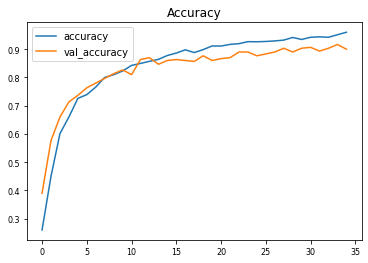

In [52]:
# get the metric names so we can use evaulate_generator
acc = pd.DataFrame(results.history)

acc[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

## Getting Validation loss and accuracy

In [54]:
res = model.evaluate_generator(test_gen)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [55]:
print('Validatio Loss: {:.4f}'.format(res[0]))
print('Validation Accuracy: {:.2f}%'.format(res[1] * 100))

Validatio Loss: 129.3146
Validation Accuracy: 92.33%


## Prediciton on test images

In [56]:
predictions = model.predict_generator(test_gen, steps=len(df_val), verbose=1)
# pred = model.predict(test_gen, steps=test_gen.samples)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


300/300 [==============================] - 12s 29ms/step


## Classification Report and Confusion Matrix

In [75]:
x = train_gen.class_indices
species = []
for key, values in x.items():
    species.append(key)
print(species)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherd’s Purse', 'Small-flowered Cranesbill', 'Sugar beet']


In [86]:
from sklearn.metrics import classification_report

# Get the actual label
y_true = test_gen.classes

#getting binary labels insteal of probabilities
# Here, the it is because the output has one-hot-encoding, shape=(n_samples)
y_pred_bn = predictions.argmax(axis=1)

print(classification_report(y_true, y_pred_bn, target_names=species))

                           precision    recall  f1-score   support

              Black-grass       0.70      0.64      0.67        25
                 Charlock       0.89      0.96      0.92        25
                 Cleavers       0.96      1.00      0.98        25
         Common Chickweed       1.00      0.92      0.96        25
             Common wheat       1.00      0.96      0.98        25
                  Fat Hen       1.00      1.00      1.00        25
         Loose Silky-bent       0.68      0.76      0.72        25
                    Maize       1.00      1.00      1.00        25
        Scentless Mayweed       1.00      0.96      0.98        25
         Shepherd’s Purse       0.93      1.00      0.96        25
Small-flowered Cranesbill       0.96      0.96      0.96        25
               Sugar beet       1.00      0.92      0.96        25

                 accuracy                           0.92       300
                macro avg       0.93      0.92      0.92    

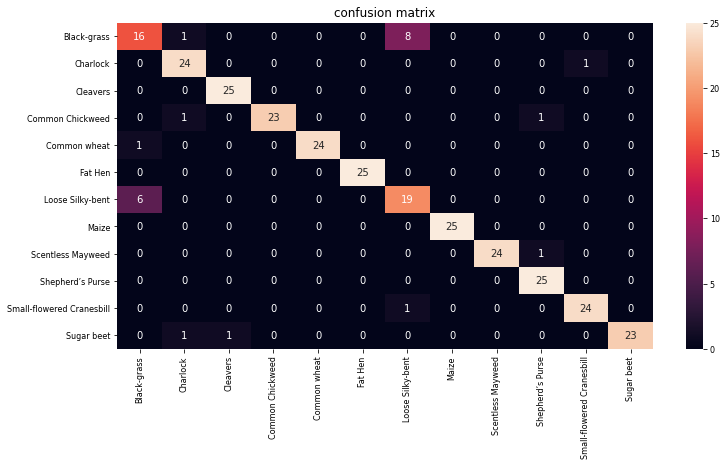

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_true, y_pred_bn)
plt.figure(figsize=(12,6))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(species)), yticklabels = sorted(set(species)))
plt.title('confusion matrix')
plt.show()

## For submission

In [63]:
x = test_gen.class_indices
species = []
for key, values in x.items():
    species.append(key)
print(species)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherd’s Purse', 'Small-flowered Cranesbill', 'Sugar beet']


In [65]:
class_ls = []
for i in range(0, predictions.shape[0]):
    y_class = predictions[i, :].argmax(axis=-1)
    class_ls += [species[y_class]]

In [89]:
sub = pd.DataFrame()
sub['file'] = test_gen.filenames
sub['species'] = class_ls
sub.head(6)

,file,species
0,Black-grass/118.png,Loose Silky-bent
1,Black-grass/161.png,Black-grass
2,Black-grass/175.png,Black-grass
3,Black-grass/180.png,Loose Silky-bent
4,Black-grass/181.png,Black-grass
5,Black-grass/189.png,Black-grass


In [90]:
sub.to_csv('final_submission.csv', index = False)
print('Submission File Created')

Submission File Created


In [ ]:
#$ python -m notebook